# Exercise 1

In [82]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import randint
import random
import pandas as pd
import math
from sklearn.model_selection import ParameterGrid
import ast

In [83]:
def DLA(time,value,c,trov):
    fig, ax = plt.subplots(figsize=(8,5), dpi=120)
    ax.plot(time, value, color='green', linestyle='dashed',linewidth=1, markersize=5)
    if trov!=0:
        ax.scatter(trov, value[trov], c='green')
    ax.set_xlabel("Time")
    ax.set_ylabel("Potential")
    ax.grid()
    ax.set_title("Distibuted Learning Algorithm")
    plt.show()
    

In [84]:
def n_infect_neighbors(i,G,state):
    neighbors = [n for n in G.neighbors(i)]
    neighbors.sort()
    neig_value=[state[n] for n in neighbors]
    return neig_value.count(1.0)
    

In [85]:
def rappr(x,y, x_name,c):
    fig, ax = plt.subplots(figsize=(10,6), dpi=120)   
    ax.plot(x, y, color="green", marker='o', linestyle='dashed',linewidth=1, markersize=5)
    ax.set_xticks(x)
    ax.set_xlabel("Weeks", fontsize=15)
    ax.set_ylabel(""+x_name,fontsize=15, fontstyle="italic")
    ax.grid()
    plt.savefig('C:/Users/chiar/Desktop/networks_dynamic/homework/HM3/figure/graph'+str(c)+'.png')
    plt.show() 

**1.1.a simulate a pandemic on a known graph**

I will use 1 to rappresent nodes that are infected, 0 for the nodes that are susceptible and 2 for the nodes that are recovered.

In [86]:
n_nodes = 500

G = nx.cycle_graph(n_nodes)

for n in range(n_nodes):
    G.add_edge(n,((n+2) % n_nodes))
    G.add_edge(n,((n-2) % n_nodes))

pos = nx.circular_layout(G)

In [87]:
beta=0.3
p=0.7

In [88]:
#cambia stato la settimana successiva
def sim_epid(G):
    
    
    state = np.zeros(500) #stato alla fine di ogni ciclo
    state[np.random.choice(np.arange(0, 500), size=10, replace=False)] = 1
        
    
    new_infected_week=[] 
    temp_s=[]
    temp_i=[]
    temp_r=[]
    state_t_prec=state.copy() #variable used to update the state of the system at the end of the week, 
    #i can't change the status during the week becasue mean that i will have some infected that became 
    #infected and count as infected during they are infeced
    
    for j in range(15):   #testo 15 settimane    
        n_infected=0
        new_ric=0
        
        for i in range(n_nodes):
            v=random.random() #variabile randomica per decidere come un nodo si comporti
           
            if(state[i]==1): #just infected, i have to decide if will be recovered or not
                
                if(v<p): #if i'm in the 70 % -> recovered
                    state_t_prec[i]=2
                    new_ric+=1
            
            if(state[i]==0): #susceptible    
                
                m = n_infect_neighbors(i,G,state) #calculate the number of infected neighbors 
                p_i_infected = 1-((1-beta)**m) #calculate the probability of became infected
                
                if( v<p_i_infected and m >0 ):# if i'm in the probability of be infected and if i have infected neighbors
                    
                    n_infected+=1 #another nodes is became infected
                    state_t_prec[i]=1 #save the actua state in state_t_prec
        
        state=state_t_prec.copy() #update the status at the end of the week
        new_infected_week.append(n_infected) 
        temp_s.append(list(state.copy()).count(0))
        temp_r.append(list(state.copy()).count(2))
        temp_i.append(list(state.copy()).count(1))
        
    return new_infected_week, temp_s, temp_i, temp_r

In [89]:
n_i_w, s,i,r = sim_epid(G)

In [90]:
n_i_w #this are the number of new infected at the end of each week

[11, 14, 9, 8, 5, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0]

In [91]:
avg_new_infected=np.zeros(15)
avg_s=np.zeros(15)
avg_i=np.zeros(15)
avg_r=np.zeros(15)
week = list(range(1,16,1))

for i in range(100):
    n_i_w, s, i , r = sim_epid(G)
    
    avg_new_infected = np.vstack(( avg_new_infected,n_i_w.copy()))
    avg_s = np.vstack(( avg_s,s.copy())) 
    avg_i = np.vstack(( avg_i,i.copy())) 
    avg_r = np.vstack(( avg_r,r.copy()))      
        

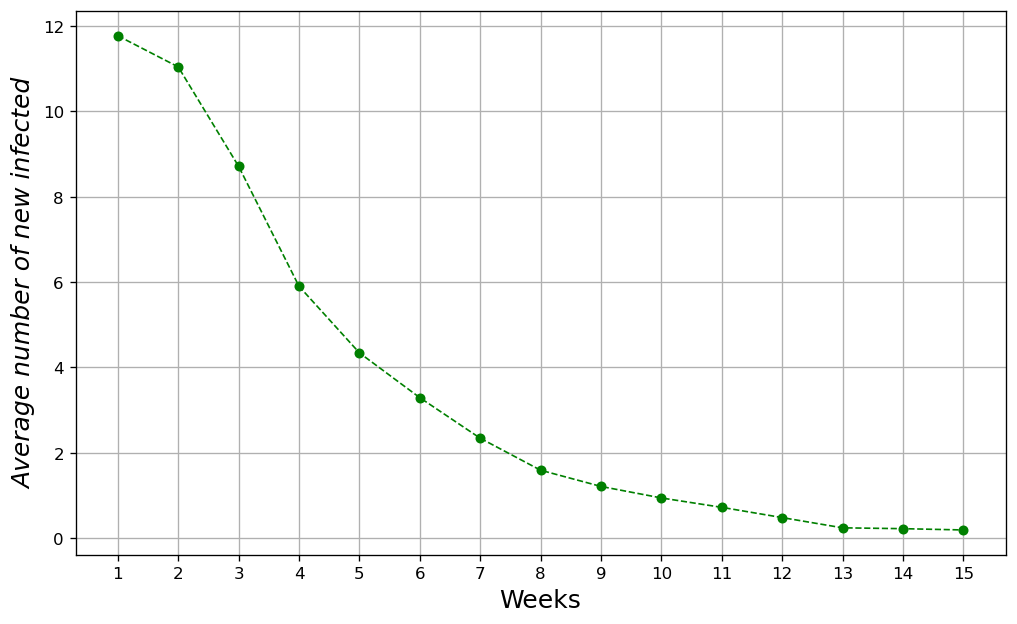

In [92]:
c=1
rappr(week, np.average(avg_new_infected[1:],axis=0), 'Average number of new infected', c ) 

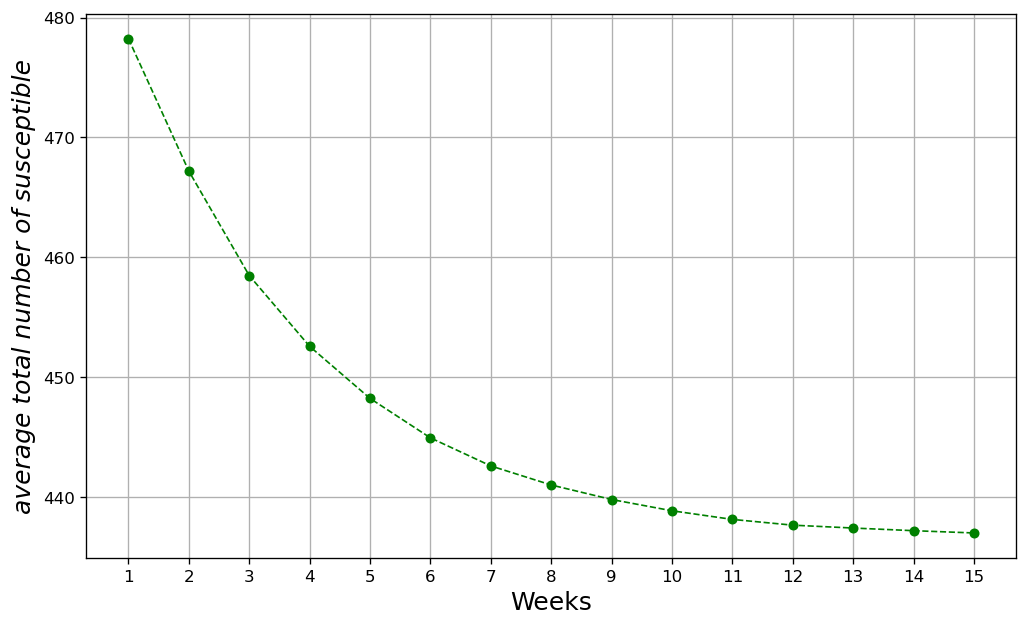

In [93]:
c+=1
rappr(week, np.average(avg_s[1:],axis=0), 'average total number of susceptible',c ) 

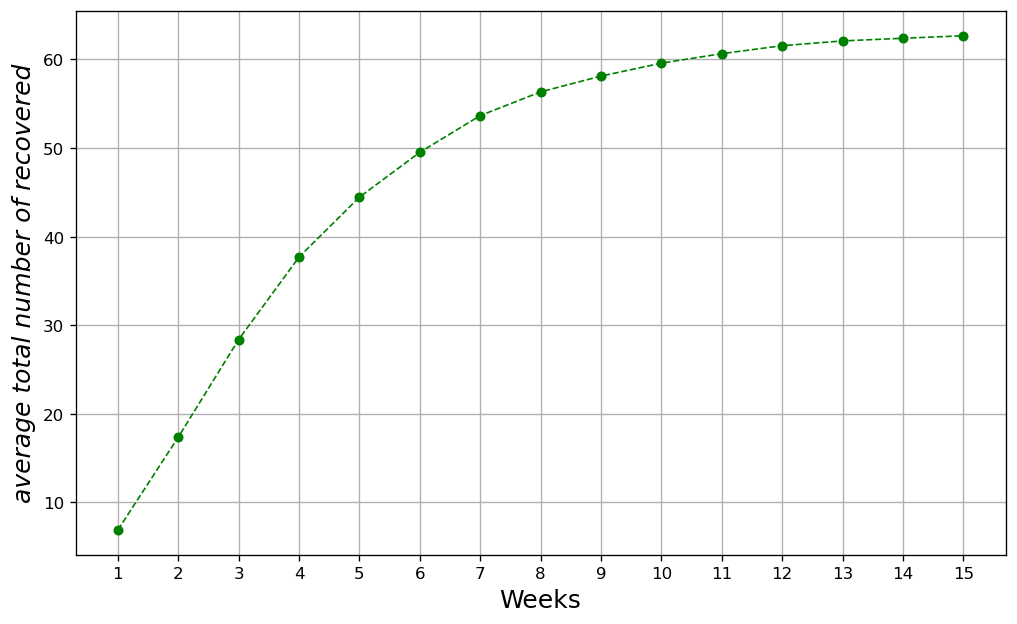

In [94]:
c+=1
rappr(week, np.average(avg_r[1:],axis=0), 'average total number of recovered',c ) 

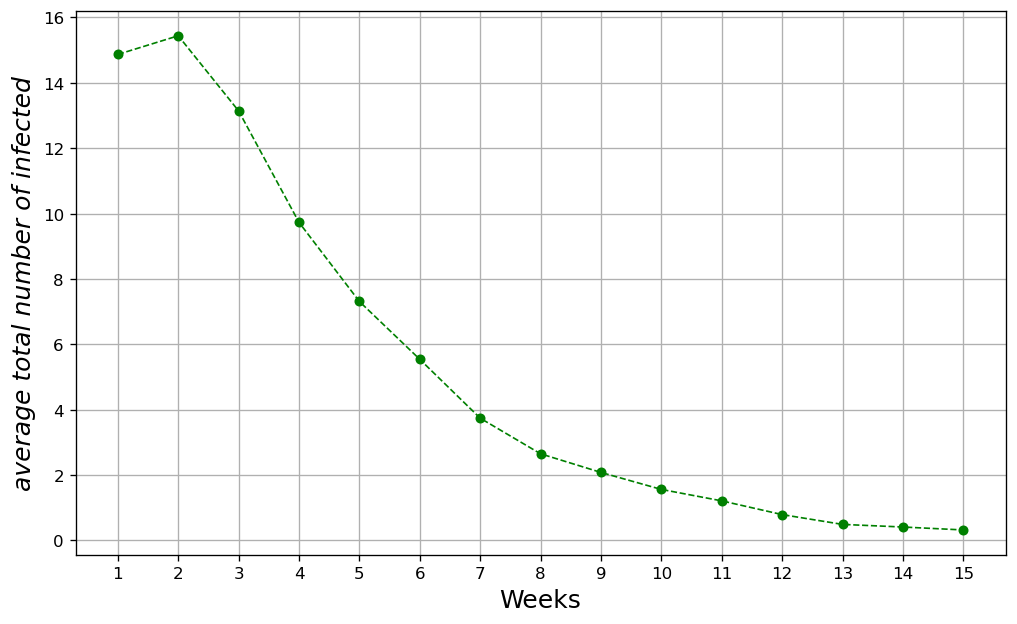

In [95]:
c+=1
rappr(week, np.average(avg_i[1:],axis=0), 'average total number of infected',c ) 

**1.1.b generate a random graph**

In [96]:
def create_graph(k,n):
    
    G_prec = nx.complete_graph(k+1)
    boolean=False
    
    for node in range(k+1,n): #i start from k+1 nodes and i want to have at the end n nodes in the graph
        
        new = G_prec #new graph
        degree = [ x for _,x in G_prec.degree()] # degree of each nodes
        prob = [x / sum(degree) for x in degree] # prob of each nodes of being chosen like neighbors
       
        if(k%2==0): #if even (pari) k/2 is an integer
            links = np.random.choice(len(G_prec),size=int(k/2), p=prob, replace = False)
        else: #if odd (dispari) i have to chose one time the rounding up value and another time the rounding down
            if(boolean==True): # if the time before i chose the rounding up i will chose the rounding down
                links = np.random.choice(len(G_prec),size=math.floor(k/2), p=prob,  replace = False)
                boolean= False
            else:
                links = np.random.choice(len(G_prec),size=math.ceil(k/2), p=prob,  replace = False)     
                boolean= True

        
        G_prec.add_node(node)
        
        for l in links:
            G_prec.add_edge(node,l)
   
    return  new       
            

In [97]:
G=create_graph(5,900)

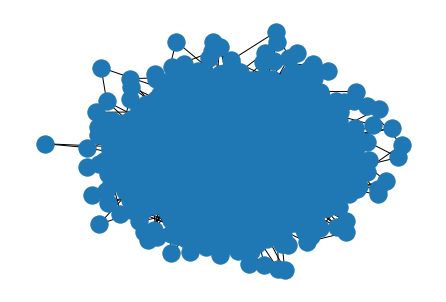

In [98]:
nx.draw(G)

In [99]:
np.mean(list(dict(G.degree).values())) #check if at the end the mean value of the degree of each nodes if equal to the value we pass

5.0

**1.2 simulate the disease propagation on a random graph without vaccination**


In [100]:
G2 = create_graph(6, 500)

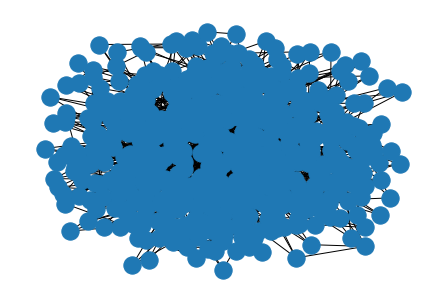

In [101]:
nx.draw(G2)

In [102]:
np.mean(list(dict(G2.degree).values()))

6.0

In [103]:
list_degree = list(dict(G2.degree).values())
d = {x:list_degree.count(x) for x in list_degree}

In [104]:
count=0
for k,v in d.items():
    if(k>6):
        count+=v

In [105]:
count

116

In [106]:
avg_new_infected=np.zeros(15)
avg_s=np.zeros(15)
avg_i=np.zeros(15)
avg_r=np.zeros(15)
week = list(range(1,16,1))

for i in range(100):
    n_i_w, s, i , r = sim_epid(G2)
    
    avg_new_infected = np.vstack(( avg_new_infected,n_i_w.copy()))
    avg_s = np.vstack(( avg_s,s.copy())) 
    avg_i = np.vstack(( avg_i,i.copy())) 
    avg_r = np.vstack(( avg_r,r.copy()))   

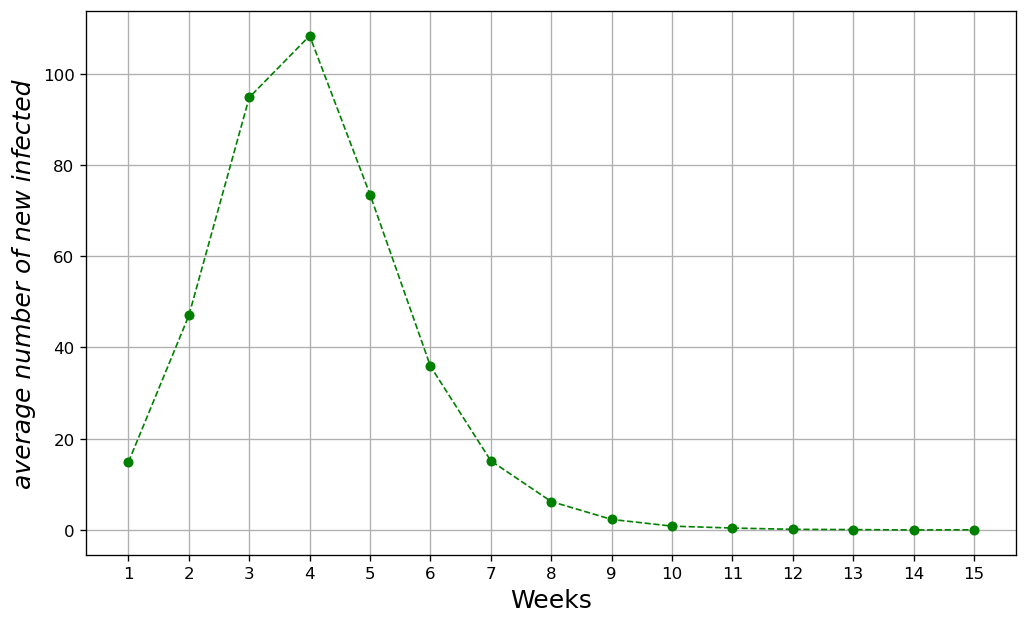

In [107]:
c+=1
rappr(week, np.average(avg_new_infected[1:],axis=0), 'average number of new infected',c ) 

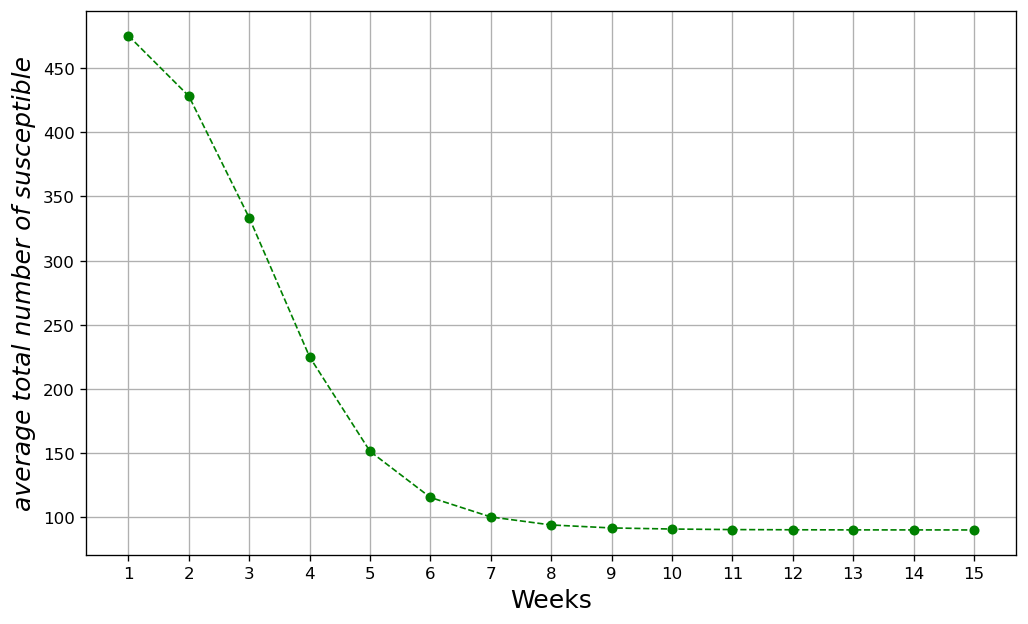

In [108]:
c+=1
rappr(week, np.average(avg_s[1:],axis=0), 'average total number of susceptible',c ) 

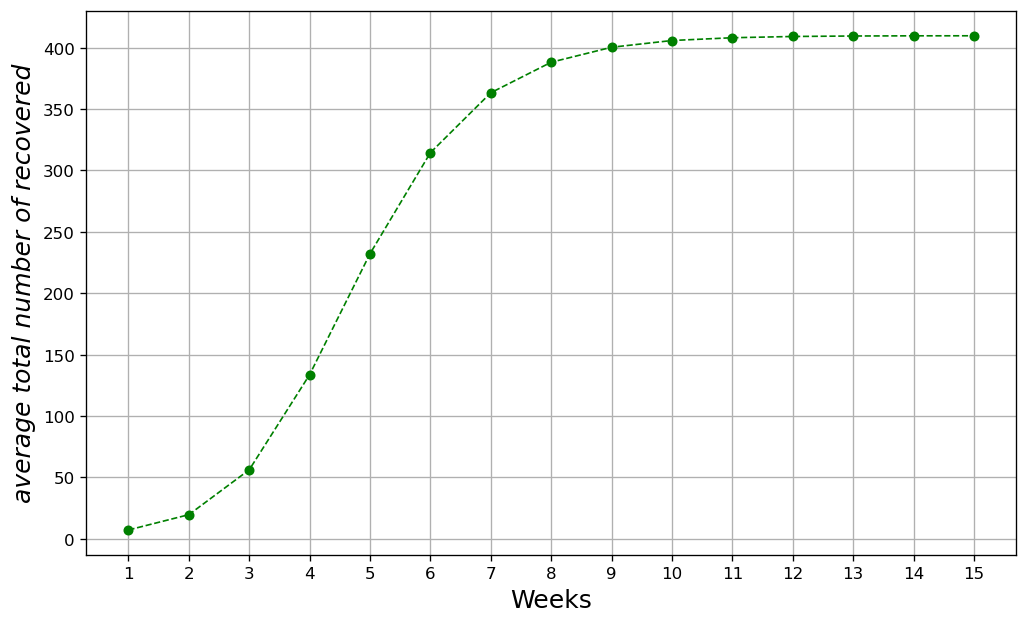

In [109]:
c+=1
rappr(week, np.average(avg_r[1:],axis=0), 'average total number of recovered',c ) 

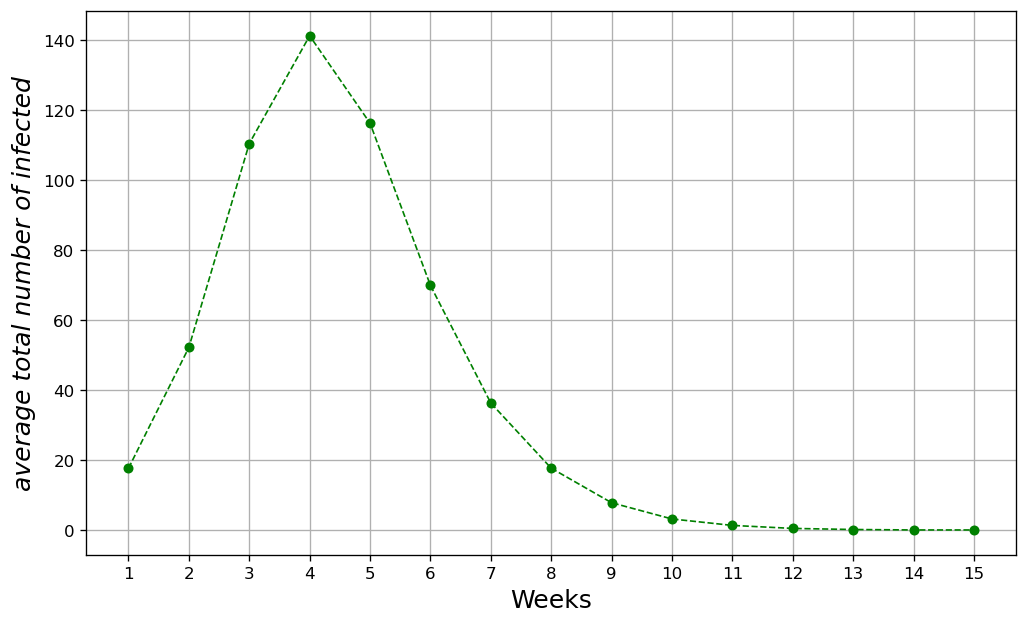

In [110]:
c+=1
rappr(week, np.average(avg_i[1:],axis=0), 'average total number of infected', c ) 

**1.3 simulate disease propagation on a random graph with vaccination**

In [111]:
new_vac=[25,50,50,50,50,50,25,0,0,0,0,0,0,0,0]

In [112]:
def sim_epid_with_vac(G):
    not_vacc =list(range(0,500)) # now i have to consider also the value of the not vaccinated
    
    
    state = np.zeros(500)
    state[np.random.choice(np.arange(0, 500), size=10, replace=False)] = 1
        
    
    new_infected_week=[] 
    new_vaccinated_week=[]
    temp_s=[]
    temp_i=[]
    temp_r=[]
    temp_v=[]
    state_t_prec=state.copy()
    
    for j in range(15):
        
        n_vac=new_vac[j] # at the beginning of each week insert the new vaccinated
        select = np.random.choice(not_vacc, size=n_vac, replace=False) # select randomly between the non vaccinated the new person to vaccinate
        
        new_vacc = n_vac
        
        not_vacc = [x for x in not_vacc if x not in select]
        state[select]=3
        state_t_prec[select] = 3
        
        n_infected=0
        
        for i in range(n_nodes):
            v=random.random()
           
            if(state[i]==1 and v<p): #just infected i have to decide if recovered
            
                    state_t_prec[i]=2
            
            if(state[i]==0): #susceptible    
                m = n_infect_neighbors(i,G,state)
                p_i_infected = 1-((1-beta)**m)
                
                if( v<p_i_infected and m>0 ):
                    
                    n_infected+=1
                    state_t_prec[i]=1
        
        state=state_t_prec.copy()
        new_infected_week.append(n_infected) 
        new_vaccinated_week.append(new_vacc)
        
        temp_s.append(list(state.copy()).count(0))
        temp_r.append(list(state.copy()).count(2))
        temp_i.append(list(state.copy()).count(1))
        temp_v.append(list(state.copy()).count(3))
        
    return new_infected_week, new_vaccinated_week, temp_s, temp_i, temp_r, temp_v

In [113]:
n_i_w, n_v_w, s, i, r, v = sim_epid_with_vac(G2)

In [114]:
avg_new_infected=np.zeros(15)
avg_new_vaccinated=np.zeros(15)
avg_s=np.zeros(15)
avg_i=np.zeros(15)
avg_r=np.zeros(15)
avg_v= np.zeros(15)
week = list(range(1,16,1))

for i in range(100):
    n_i_w, n_v_w, s, i , r,v = sim_epid_with_vac(G2)
    
    avg_new_infected = np.vstack(( avg_new_infected,n_i_w.copy()))
    avg_new_vaccinated = np.vstack((avg_new_vaccinated, n_v_w.copy()))
    avg_s = np.vstack(( avg_s,s.copy())) 
    avg_i = np.vstack(( avg_i,i.copy())) 
    avg_r = np.vstack(( avg_r,r.copy()))  
    avg_v = np.vstack(( avg_v,v.copy()))

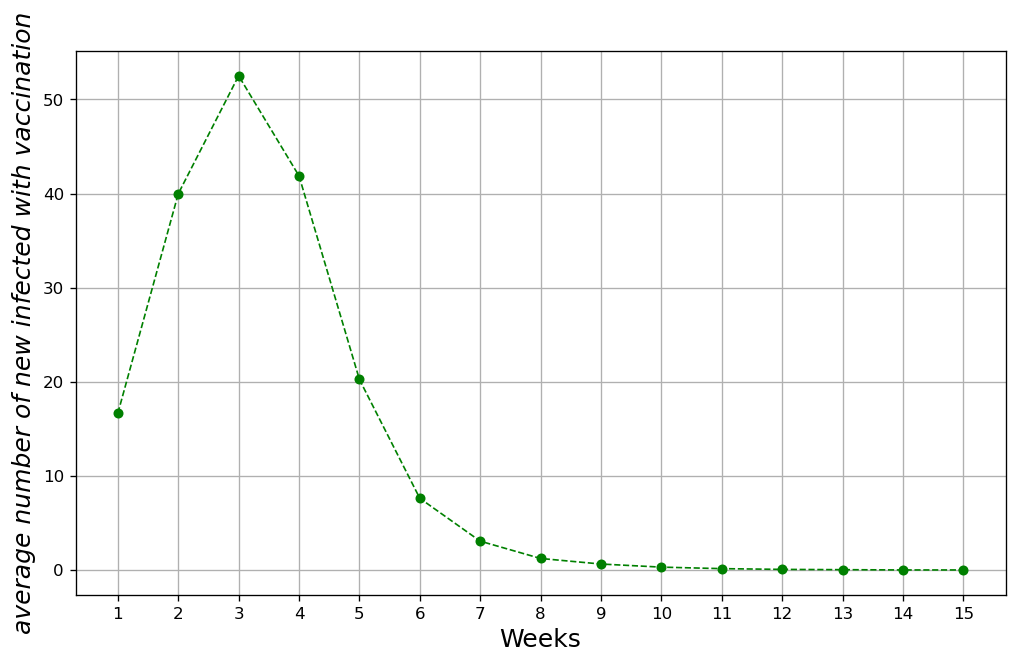

In [115]:
c+=1 
rappr(week, np.average(avg_new_infected[1:],axis=0), 'average number of new infected with vaccination', c) 

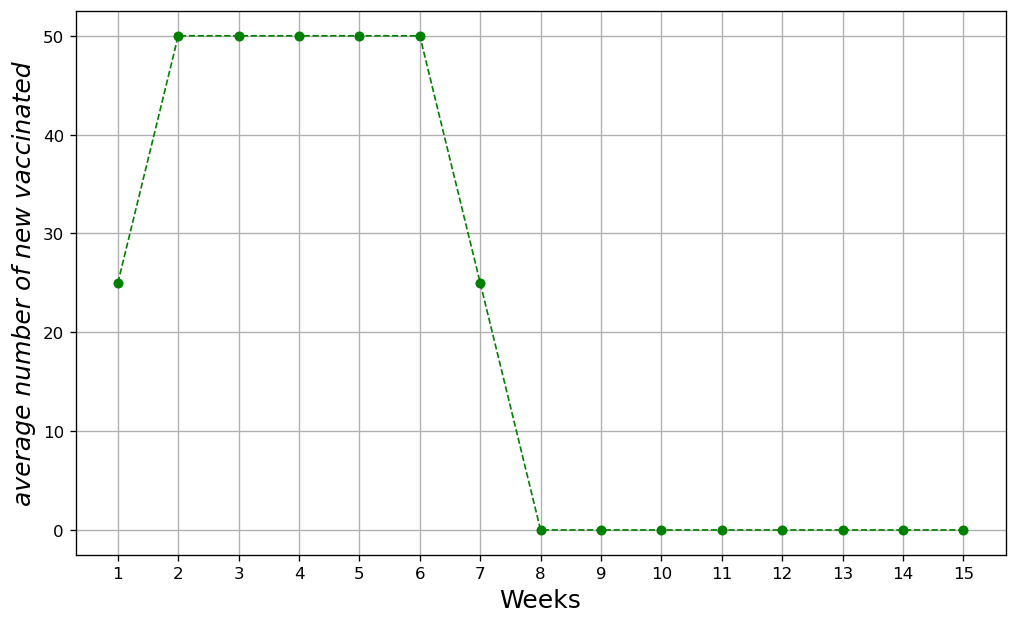

In [116]:
c+=1
rappr(week, np.average(avg_new_vaccinated[1:],axis=0), 'average number of new vaccinated' ,c ) 

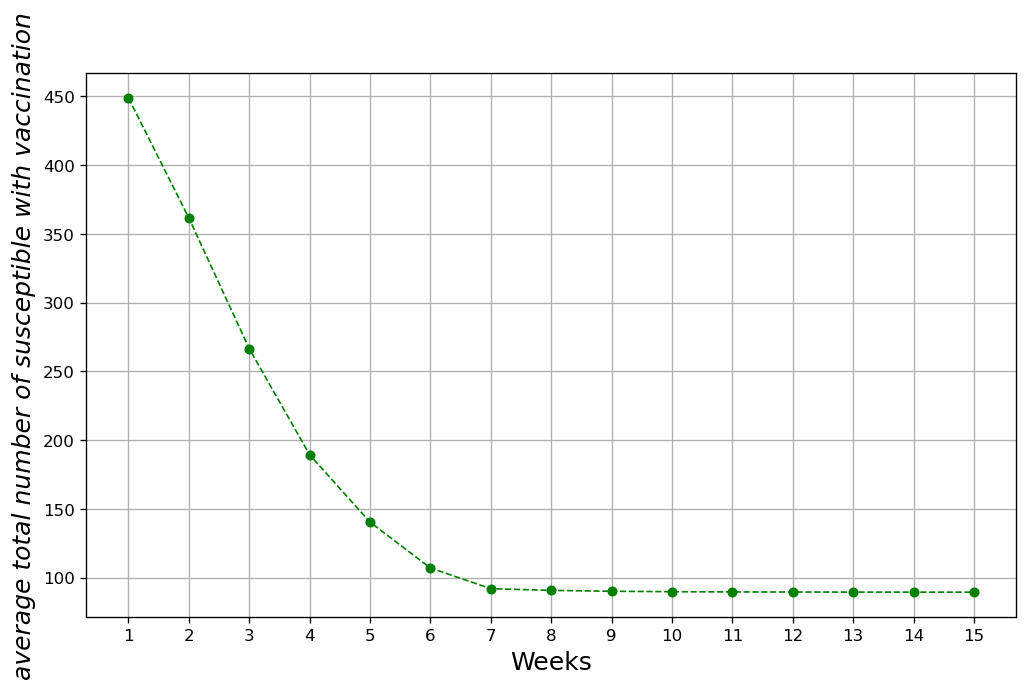

In [117]:
c+=1
rappr(week, np.average(avg_s[1:],axis=0), 'average total number of susceptible with vaccination', c ) 

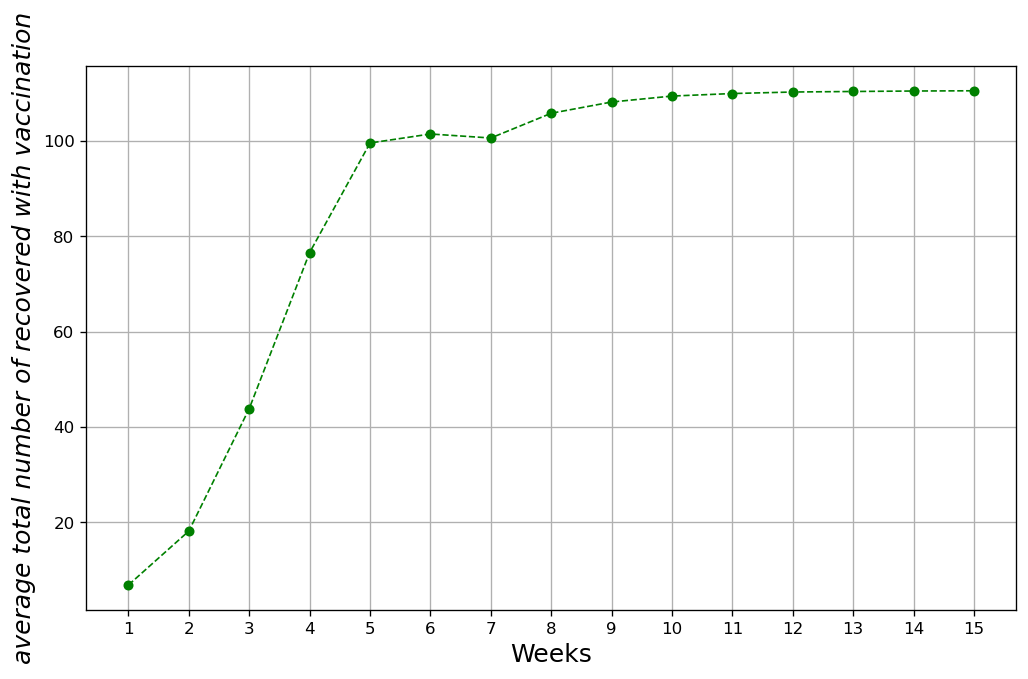

In [118]:
c+=1
rappr(week, np.average(avg_r[1:],axis=0), 'average total number of recovered with vaccination', c ) 

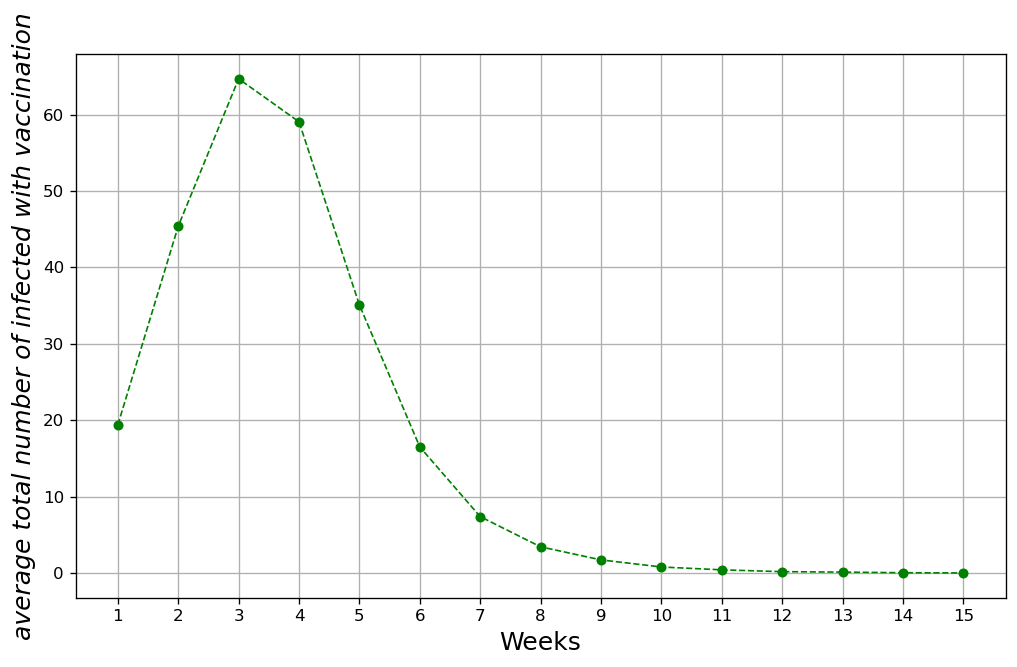

In [119]:
c+=1
rappr(week, np.average(avg_i[1:],axis=0), 'average total number of infected with vaccination',c ) 

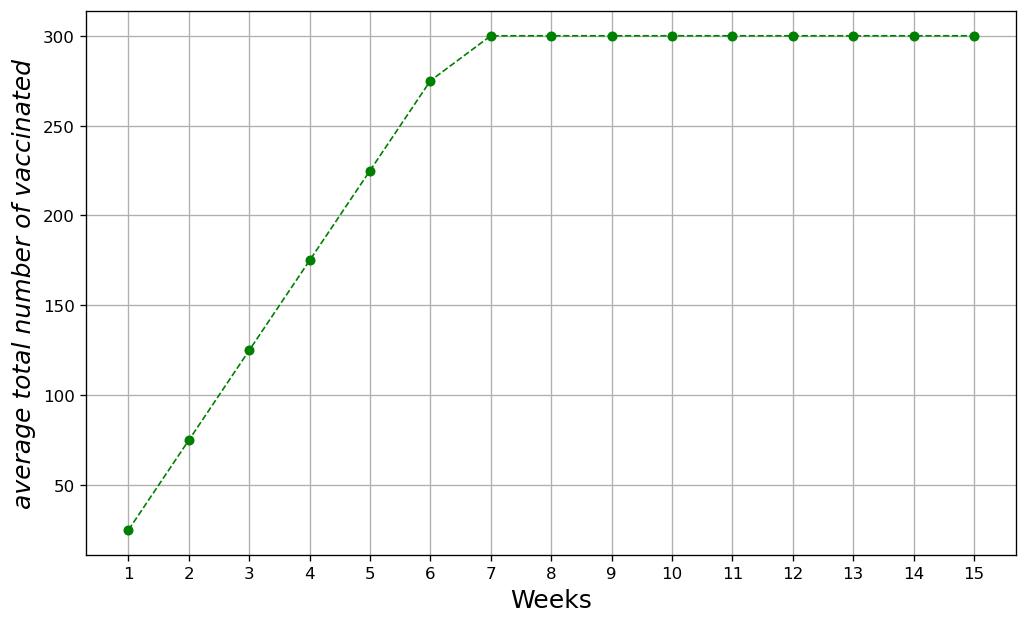

In [120]:
c+=1
rappr(week, np.average(avg_v[1:],axis=0), 'average total number of vaccinated', c ) 

**1.4 estimate the network-structure characteristics and disease-dynamics parameters for the
pandemic in Sweden during the fall of 2009**

In [121]:
k0=[9,10,11]
b0=[0.2,0.3,0.4]
p0=[0.5,0.6,0.7]
I0= [1,3,5,9,17,32,32,17,5,2,1,0,0,0,0]
new_vac=[46,37,65,74,74,74,65,65,46,9,0,0,0,0,0] 
N=934

In [122]:
def sim_epid_sweden(k0,b0,p0,N,tipo):
   
    param_grid = { 
               'k': k0,
               'b': b0,               
               'p': p0 }
    
    pg = ParameterGrid(param_grid)
    res = {}
    res_i = {}
    res_s = {}
    res_r = {}

    for crit in pg:
    #change only if crit[k] change 
     if tipo=='PA':
            G=create_graph(crit['k'],N) # create the new graph with the new k
     
     elif tipo=='SW':
            G=small_world(N,crit['k'])
     
     elif tipo=='CM':
            G=configuration_model(N, crit['k'])
     
     else:
        print("define graph type")
        
     
     new_avg_infected=[]     
     res_inf=[]
     res_rec=[]
     res_sus=[]
        
     
     for time in range(10):
            
        new_avg=np.zeros(15) 
        sus_avg=np.zeros(15) 
        inf_avg=np.zeros(15) 
        rec_avg=np.zeros(15) 
        
        not_vacc= list(range(0,N)) #nodes that are not vaccianted
    
        state = np.zeros(N)
        state[np.random.choice(np.arange(0, N), size=1, replace=False)] = 1
        
        new_infected_week=[]  #save the number of infected of each week  
        state_t_prec=state.copy()      
        temp_s=[]
        temp_i=[]
        temp_r=[] 
        
        for j in range(15):
            n_vac=new_vac[j]
            select = np.random.choice(not_vacc, size=n_vac, replace=False)#random.choices(not_vacc, k=n_vac)
            not_vacc = [x for x in not_vacc if x not in select]
            
            state[select]=3
            state_t_prec[select] = 3
            
            n_infected=0
        
            for i in range(n_nodes):
                v=random.random()
           
                if(state[i]==1) and (v<crit['p']) : #just infected
                   
                        state_t_prec[i]=2
            
                if(state[i]==0): #susceptible    
                    
                    m = n_infect_neighbors(i,G,state)
                    p_i_infected = 1-((1-crit['b'])**m)
                
                    if( v<p_i_infected and m >0 ):
                        n_infected+=1
                        state_t_prec[i]=1
                   
            state=state_t_prec.copy()
            new_infected_week.append(n_infected)
            temp_s.append(list(state.copy()).count(0))
            temp_r.append(list(state.copy()).count(2))
            temp_i.append(list(state.copy()).count(1))
                              
        new_avg = np.vstack((new_avg, new_infected_week.copy()))
        sus_avg = np.vstack((sus_avg, temp_s.copy())) 
        inf_avg = np.vstack((inf_avg, temp_i.copy())) 
        rec_avg = np.vstack((rec_avg, temp_r.copy()))
    
     new_avg_infected.append(np.average(new_avg[1:],axis=0)) # avg of infected for each week after the 10 simulation with some paraemters  
     res_inf.append(np.average(inf_avg[1:],axis=0))
     res_rec.append(np.average(rec_avg[1:],axis=0))
     res_sus.append(np.average(sus_avg[1:],axis=0))
    
     res[''+str(crit)]=new_avg_infected
     res_i[''+str(crit)]=res_inf
     res_s[''+str(crit)]=res_sus
     res_r[''+str(crit)]=res_rec 

    return res, res_i, res_s, res_r

In [123]:
def find_best_value(res):
    find_min=[]
    for i in res.values():
        rmse = math.sqrt((1/15)*sum((i[0]-np.array(I0))**2))
        #print('rmse',rmse)
        find_min.append(rmse)
        
    minimum=np.array(find_min).min()   #find the parameters with the min rmse
    pos_minimum=find_min.index(minimum)
    value_minimum=list(res.keys())[pos_minimum] #parameters that return the min rmse
    
    return value_minimum, minimum

In [124]:
def new_b_k_p(d, delta1, delta2):
    b0=[d['b']-delta1, d['b'], d['b']+delta1]
    k0=[d['k']-delta2, d['k'], d['k']+delta2]
    p0=[d['p']-delta1, d['p'], d['p']+delta1]
    return b0,k0,p0

In [125]:
def graph_sim_vs_real(I0,b_v, res):
    fig, ax = plt.subplots(figsize=(8,5), dpi=120)
    ax.plot(I0, color='green', linestyle='dashed',linewidth=1, markersize=5, label= 'real pandemic')
    ax.plot([int(i) for i in res[b_v][0]], color='orange', linestyle='dashed',linewidth=1, markersize=5, label= 'simulation')
    ax.set_xlabel("Week")
    ax.set_ylabel("new infected")
    ax.grid()
    ax.legend()
    ax.set_title("New infected for each week simulation vs real pandemic")
    plt.savefig('C:/Users/chiar/Desktop/networks_dynamic/homework/HM3/figure/sim_rp.png')
    plt.show()

In [126]:
def sim_vs_real(tipo, k0, b0, p0,N):
    same=1000
    best_par_finora={}
    par_prec={}
    res_prec=()
    t=0

    while t!=100:
        
        res, res_i, res_s, res_r = sim_epid_sweden(k0,b0,p0,N,tipo)
        
        b_v,minimum = find_best_value(res)
        print(b_v)
        print(minimum)
        #print(res[b_v])
    
        if(b_v==par_prec):
            print('trovato ',b_v)
            return b_v, res, res_i, res_s, res_r  
            break
        else:
            par_prec=b_v
            res_prec=res[b_v]
    
        if(minimum<same):
            same = minimum
            best_par_finora=b_v
            b0,k0,p0 = new_b_k_p(ast.literal_eval(b_v), 0.1, 1)
        else:
            b0,k0,p0 = new_b_k_p(ast.literal_eval(best_par_finora), 0.05, 1)
    
        t+=1
    return  best_par_finora, res, res_i, res_s, res_r   

In [127]:
bv_PA,res_PA, res_i_PA, res_s_PA, res_r_PA = sim_vs_real('PA', k0, b0, p0, N)

{'b': 0.2, 'k': 11, 'p': 0.6}
4.266145801540309
{'b': 0.2, 'k': 10, 'p': 0.7}
4.553387017741116
{'b': 0.15000000000000002, 'k': 11, 'p': 0.5499999999999999}
6.159004248523728
{'b': 0.15000000000000002, 'k': 10, 'p': 0.65}
4.457203906785808
{'b': 0.15000000000000002, 'k': 12, 'p': 0.6}
6.434283176858165
{'b': 0.15000000000000002, 'k': 12, 'p': 0.5499999999999999}
4.553387017741116
{'b': 0.15000000000000002, 'k': 10, 'p': 0.5499999999999999}
3.2761766334148303
{'b': 0.15000000000000002, 'k': 11, 'p': 0.6499999999999999}
2.6832815729997477
{'b': 0.15000000000000002, 'k': 10, 'p': 0.6499999999999999}
3.022140521771503
{'b': 0.15000000000000002, 'k': 10, 'p': 0.6499999999999999}
3.8470768123342687
trovato  {'b': 0.15000000000000002, 'k': 10, 'p': 0.6499999999999999}


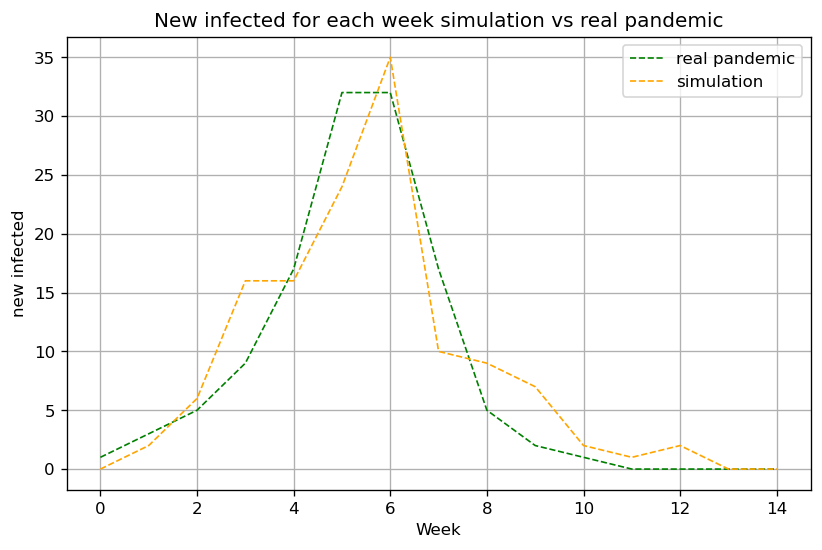

In [128]:
graph_sim_vs_real(I0, bv_PA, res_PA)

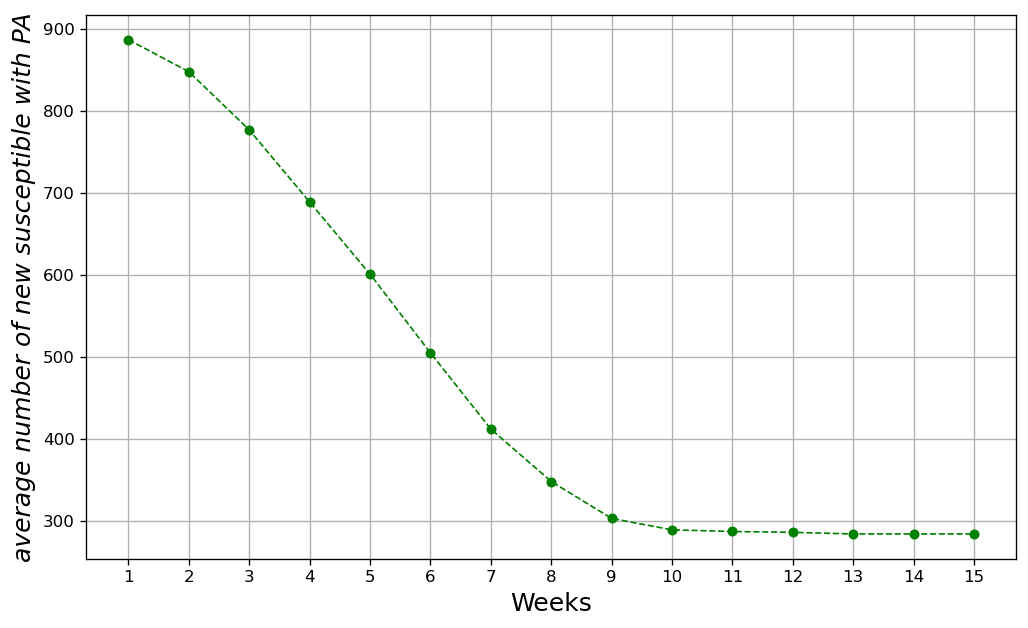

In [129]:
c+=1 
rappr(week,[int(i) for i in res_s_PA[bv_PA][0]], 'average number of new susceptible with PA', c) 

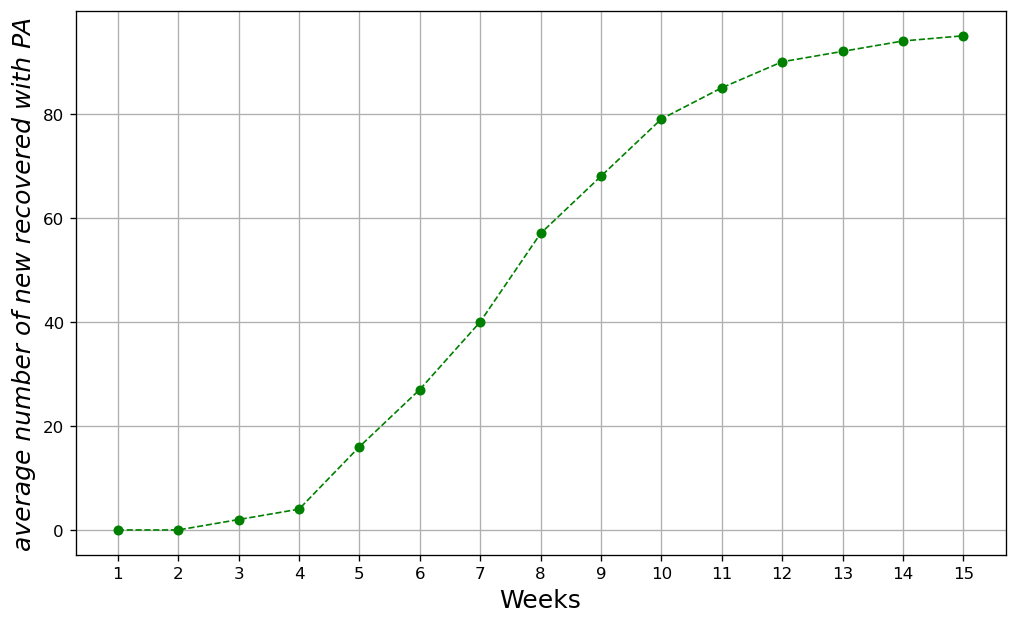

In [130]:
c+=1 
rappr(week,[int(i) for i in res_r_PA[bv_PA][0]], 'average number of new recovered with PA', c) 

**find a better random graph and find a better algorithm**

In [131]:
def configuration_model(n, k):
    """
    Creates and returns a Configuration model graph with a ring topology,
    given the number of nodes n, the number of nearest neighbors k.
    
    Parameters:
    n (int): number of nodes
    k (int): number of nearest neighbors
    
    Returns:
    G (networkx.Graph): Configuration model graph
    """
    degree_sequence = [k]*n
    G = nx.configuration_model(degree_sequence)
    G = nx.Graph(G) # remove parallel edges and self-loops
    return G

In [132]:
def small_world(n, k, p=0.05, to_print=False):
    """
    Creates and returns a Newman-Watts-Strogatz small-world graph,
    given the number of nodes n, the number of nearest neighbors k, 
    and the probability of rewiring p.
    
    Parameters:
    n (int): number of nodes
    k (int): number of nearest neighbors
    p (float): probability of rewiring (default=0.05)
    
    Returns:
    G (networkx.Graph): Newman-Watts-Strogatz small-world graph
    """
    if (k > n) or (n <= 0) or (k <= 1) or (p>1) or (p<0):
       raise ValueError("Invalid parameters")
    G = nx.newman_watts_strogatz_graph(n, k, p)
    average_degree=sum([d for n,d in G.degree()])/G.number_of_nodes()
    if to_print==True:
        print("Average degree: ", average_degree)
        print("Diameter:", nx.diameter(G))
        print("Clustering coefficient", nx.average_clustering(G), "\n")
        pos = nx.circular_layout(G)
    return G

In [134]:
bv_SW,res_SW, res_i_SW, res_s_SW, res_r_SW = sim_vs_real('SW',k0, b0, p0, N)

{'b': 0.4, 'k': 11, 'p': 0.5}
7.797435475847171
{'b': 0.4, 'k': 12, 'p': 0.4}
6.908931417616861
{'b': 0.4, 'k': 12, 'p': 0.4}
8.078778785600374
trovato  {'b': 0.4, 'k': 12, 'p': 0.4}


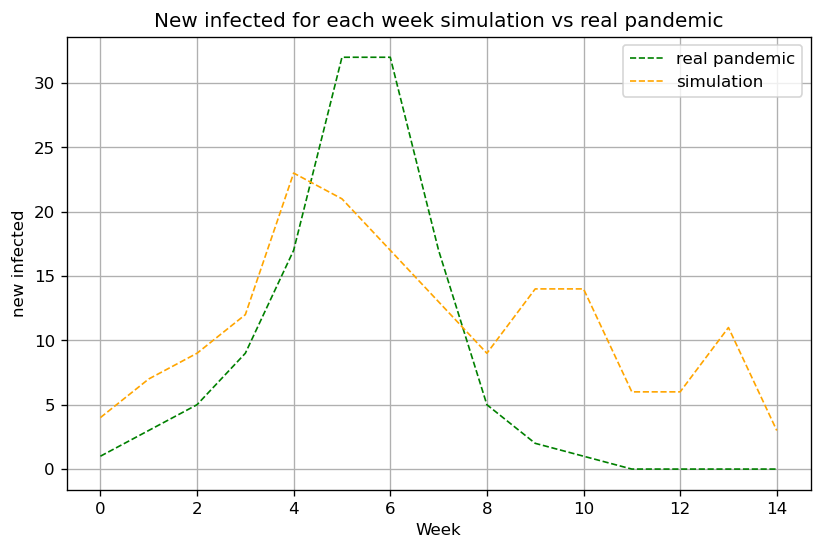

In [135]:
graph_sim_vs_real(I0, bv_SW, res_SW)

In [136]:
G_prov=small_world(926,13)
print('mean',np.mean(list(dict(G_prov.degree).values())))
list_degree = list(dict(G_prov.degree).values())
d = {x:list_degree.count(x) for x in list_degree}
print(d)

mean 12.568034557235421
{12: 529, 13: 292, 14: 83, 15: 20, 16: 2}


In [137]:
bv_CM,res_CM, res_i_CM, res_s_CM, res_r_CM = sim_vs_real('CM',k0, b0, p0, N)

{'b': 0.4, 'k': 11, 'p': 0.7}
5.378971401051816
{'b': 0.4, 'k': 12, 'p': 0.6}
4.033195589934446
{'b': 0.30000000000000004, 'k': 13, 'p': 0.6}
6.0553007081949835
{'b': 0.4, 'k': 11, 'p': 0.5499999999999999}
5.513619500836088
{'b': 0.45, 'k': 11, 'p': 0.5499999999999999}
4.9866488413228645
{'b': 0.45, 'k': 11, 'p': 0.6}
4.538722287164087
{'b': 0.4, 'k': 11, 'p': 0.6}
2.7325202042558927
{'b': 0.5, 'k': 10, 'p': 0.5}
5.409867527644892
{'b': 0.45, 'k': 10, 'p': 0.65}
4.857983120596447
{'b': 0.4, 'k': 10, 'p': 0.5499999999999999}
4.898979485566356
{'b': 0.45, 'k': 12, 'p': 0.65}
4.0743097574926725
{'b': 0.4, 'k': 11, 'p': 0.65}
4.760952285695233
{'b': 0.4, 'k': 12, 'p': 0.5499999999999999}
3.559026084010437
{'b': 0.4, 'k': 12, 'p': 0.5499999999999999}
5.208966628164681
trovato  {'b': 0.4, 'k': 12, 'p': 0.5499999999999999}


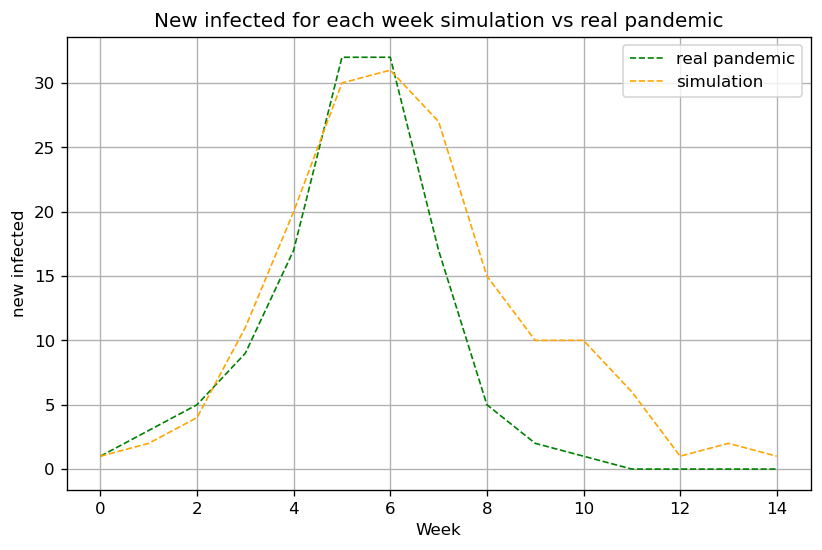

In [138]:
graph_sim_vs_real(I0, bv_CM, res_CM)

In [139]:
G_prov2=configuration_model(926,13)
print('mean',np.mean(list(dict(G_prov2.degree).values())))
list_degree = list(dict(G_prov2.degree).values())
d = {x:list_degree.count(x) for x in list_degree}
print(d)

mean 12.937365010799136
{13: 870, 12: 54, 11: 2}


# Exercise 2

**linear graph with 10 nodes**

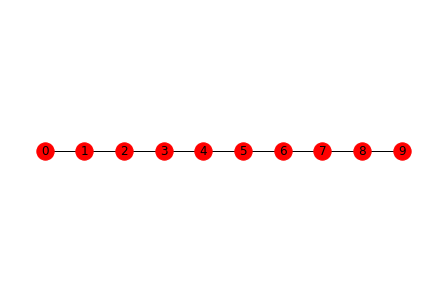

In [140]:
G3 = nx.Graph()

for i in range(10):
    G3.add_node(i)

for i in range(9):
    G3.add_edge(i, i+1)

pos = {0: [0,0], 1: [1,0], 2: [2,0], 3: [3,0], 4: [4,0], 5: [5,0], 6: [6,0], 7: [7,0], 8: [8,0], 9: [9,0] }    
nx.draw(G3,pos, with_labels=True, node_color='r')    

In [141]:
def sum_same_color_neighbors(c_n,i,G):
    res=0
    neighbors = [n for n in G.neighbors(i)] 
    for j in neighbors:
        if(j in c_n): #if the neighbors are of the color chose -> increment
            res+=1
                
    return res

In [142]:
def potential_func(r_n, g_n):
    summ=0
    for i in range(10):
        
        neighbors = [n for n in G3.neighbors(i)] 
        for n in neighbors:
            if((i in r_n) and (n in r_n)):
                summ+=1
            if((i in g_n) and (n in g_n)):
                summ+=1
             
    u = 1/2 *summ
    return u  

In [143]:
u = 1
t = 0
red_nodes=list(range(0,10))
green_nodes=[]
time=[]
value=[]

while u !=0:
    
    I_t = random.randint(0, 9) #choose a random node
    n=t/100
    sum_g =  sum_same_color_neighbors(green_nodes,I_t,G3)
    sum_r =  sum_same_color_neighbors(red_nodes,I_t,G3)
    num = pow(math.e,-n*sum_g)
    den= num + pow(math.e,-n*sum_r) 
    p_g=num/den
    v=random.random()
    
    if(v<p_g): #nodes became or remain green
        
        if(I_t not in green_nodes):
            green_nodes.append(I_t)
            red_nodes.remove(I_t)
            
    else: #else became or remain red
        
        if(I_t not in red_nodes):
            red_nodes.append(I_t)
            green_nodes.remove(I_t)
            
    t+=1        
    u=potential_func(red_nodes, green_nodes)
    
    time.append(t) 
    value.append(u)

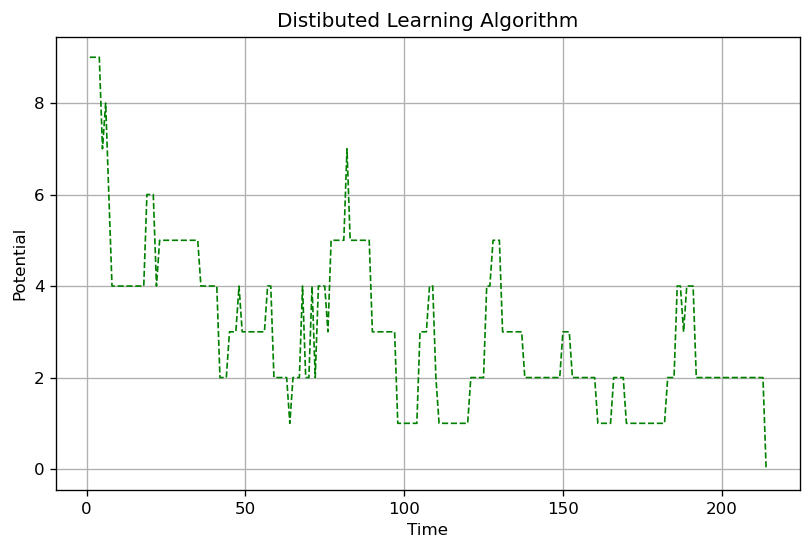

In [144]:
fig, ax = plt.subplots(figsize=(8,5), dpi=120)
ax.plot(time, value, color='green', linestyle='dashed',linewidth=1, markersize=5)
ax.set_xlabel("Time")
ax.set_ylabel("Potential")
ax.grid()
ax.set_title("Distibuted Learning Algorithm")
plt.show()

In [145]:
color_map = ['red' if node in red_nodes else 'green' for node in G3]   

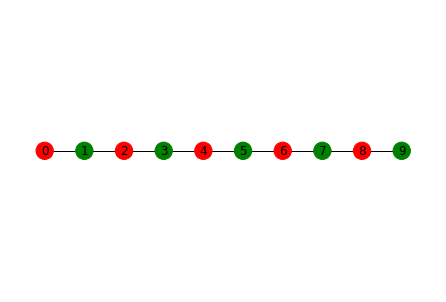

In [146]:
nx.draw(G3,pos, with_labels=True, node_color=color_map)  

**problem of assigning wifi-channels to routers**

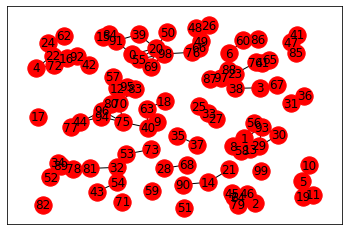

In [147]:
W = np.loadtxt('wifi.mat')
G4 = nx.from_numpy_matrix(W)
cord = np.loadtxt('coords.mat')
nx.draw_networkx(G4, pos = cord, node_color='r')

In [148]:
def compute_all_color(diz_c,I_t,G,n): #devi considerare anche se stesso colore o un altro
    
    num=[]
    lista_colori_vicini=[]
    colorI_t = diz_c[I_t]
                            
    for i in list(G.neighbors(I_t)):
        lista_colori_vicini.append(diz_c[i])
    
    numero_vicini_colore={x:lista_colori_vicini.count(x) for x in lista_colori_vicini} #red:3 yello:2
         
    for i in range(8): 
        costo_che_avrebbe_colore_i=0
        for k,v in numero_vicini_colore.items():
            if(k==i+1):
                costo_che_avrebbe_colore_i+=(2*v)
            elif(abs(i+1-k)==1):
                costo_che_avrebbe_colore_i+=(1*v)
                
        num.append(np.exp(-(n*costo_che_avrebbe_colore_i)))        
    
    den = sum(num)
    
    return np.array(num)/den    

In [149]:
def potential_func_multi_color(state, G):
    costo=0
    for k,v in state.items():
        for n in list(G.neighbors(k)):
            if(state[k] == state[n]):
                costo+=2
            if(abs(state[k] - state[n])==1):
                costo+=1
                
    return ((0.5) *costo) 

In [150]:
def sim_changing_n(n_t):
    u = 1
    t = 0
    arrived=0
    b=True
    time=[]
    value=[]
    possible_color=[1,2,3,4,5,6,7,8]
    state={}
    
    for i in range(100):
        state[i]=1
    
    while t !=1000:
        I_t = np.random.randint(0, 100) #choose a random node
        n=n_t[t]
        p_all_color=compute_all_color(state, I_t, G4,n) 
        color_select = np.random.choice(possible_color,1,p=p_all_color)
        state[I_t]=color_select[0]
        t+=1        
        u=potential_func_multi_color(state, G4)
        if(u==4 and b==True):
            arrived=t
            b=False
            
        time.append(t) 
        value.append(u)
    return state, time, value, arrived

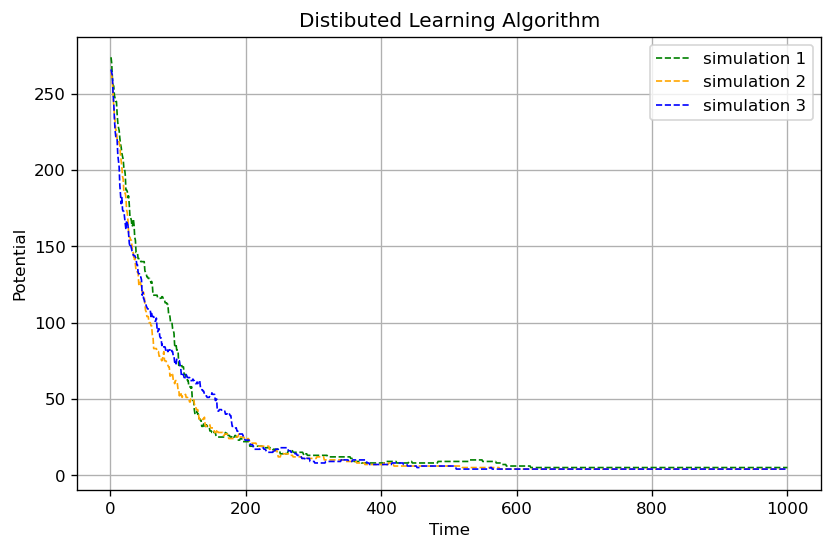

In [151]:
s,t,v,trov=sim_changing_n([x/100 for x in range(1000)])
s2,t2,v2,trov2=sim_changing_n([x/100 for x in range(1000)])
s3,t3,v3,trov3=sim_changing_n([x/100 for x in range(1000)])

fig, ax = plt.subplots(figsize=(8,5), dpi=120)
ax.plot(t, v, color='green', linestyle='dashed',linewidth=1, markersize=5, label='simulation 1')
ax.plot(t2, v2, color='orange', linestyle='dashed',linewidth=1, markersize=5, label='simulation 2')
ax.plot(t3, v3, color='blue', linestyle='dashed',linewidth=1, markersize=5, label='simulation 3')
ax.legend()
ax.set_xlabel("Time")
ax.set_ylabel("Potential")
ax.grid()
ax.set_title("Distibuted Learning Algorithm")
plt.show()

In [152]:
min(value)

0.0

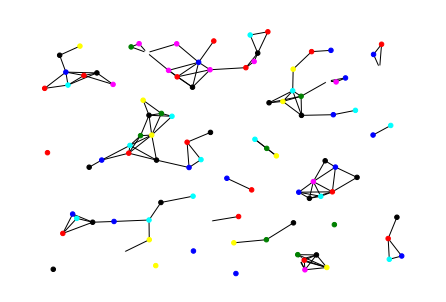

In [153]:
color= {1 : 'red', 2 : 'green', 3 : 'blue', 4 : 'yellow', 5 : 'magenta', 6 : 'cyan', 7 : 'white', 8 :
'black'}
color_map2 = [color[n] for n in s.values()]   
nx.draw(G4, pos=cord, node_size=20, node_color=color_map2)

**different choices of η(t)**

In [158]:
print('fixed n small')
ss,ts,vs, trovs=sim_changing_n([0.01 for x in range(1000)])
print('min_value', min(vs))
print('trovato', trovs)

fixed n small
min_value 48.0
trovato 0


In [159]:
print('fixed n large')
sl,tl,vl, trovl=sim_changing_n([300 for x in range(1000)])
print('min_value', min(vl))
print('trovato', trovl)

fixed n large
min_value 4.0
trovato 494


In [160]:
print('n = log(x)')
si,ti,vi,trovi=sim_changing_n([np.log(x+1) for x in range(1000)])
print('min_value', min(vi))
print('trovato', trovi)

n = log(x)
min_value 4.0
trovato 349


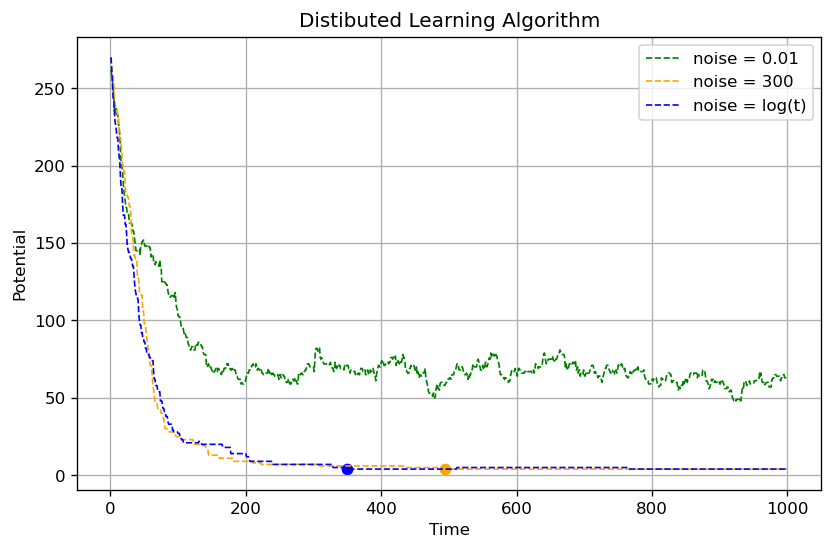

In [161]:
fig, ax = plt.subplots(figsize=(8,5), dpi=120)
marker = {trovs:['green',vs], trovl:['orange',vl], trovi:['blue',vi]}
ax.plot(ts, vs, color='green', linestyle='dashed',linewidth=1, markersize=5, label='noise = 0.01')
ax.plot(tl, vl, color='orange', linestyle='dashed',linewidth=1, markersize=5, label='noise = 300')
ax.plot(ti, vi, color='blue', linestyle='dashed',linewidth=1, markersize=5, label='noise = log(t)')
    
for k,v in marker.items():
        if(k!=0):
            ax.scatter(k, v[1][k], c=v[0])
        
ax.set_xlabel("Time")
ax.set_ylabel("Potential")
ax.grid()
ax.legend()
ax.set_title("Distibuted Learning Algorithm")
plt.savefig('C:/Users/chiar/Desktop/networks_dynamic/homework/HM3/figure/DLAopt.png')
plt.show()